# The first objective is to take this sample image, and break it down into readable and consistent sizes that center the object of interest. 

In [6]:

%matplotlib inline


import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import glob
from sklearn.preprocessing import normalize
from cv2 import COLOR_GRAY2RGB
from imutils import contours
from skimage import measure
import numpy as np
import imutils


In [7]:
imagefile = '../data/lsst.jpg'

Using image masking based on code @ https://www.pyimagesearch.com/2016/10/31/detecting-multiple-bright-spots-in-an-image-with-python-and-opencv/

In [8]:
# load the image, convert it to grayscale, and blur it
image = cv2.imread(imagefile)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)

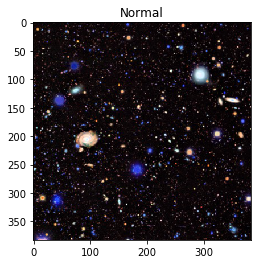

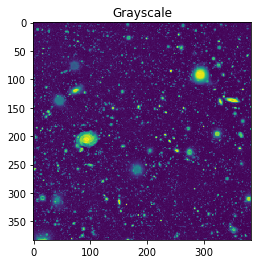

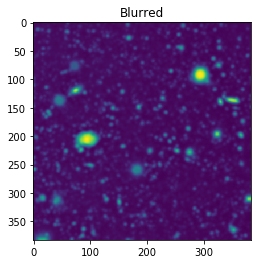

In [10]:
plt.title("Normal")
plt.imshow(image)
plt.figure()
plt.title("Grayscale")
plt.imshow(gray)
plt.figure()
plt.title("Blurred")
plt.imshow(blurred)

The importance of this blur is it gives a sort of uniformity to the objects of interest, making it easier to identify as belonging to the same part of the image. This is even more apparent when using a threshold as seen below.

In [11]:
# threshold the image to reveal light regions in the
# blurred image
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

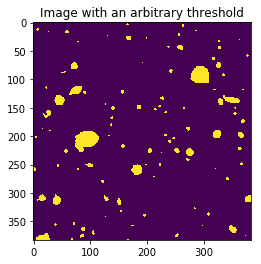

In [13]:
plt.title("Image with an arbitrary threshold")
plt.imshow(thresh)

In [14]:
#These labels correspond to the different regions. 
labels = measure.label(thresh, neighbors=8, background=0)
mask = np.zeros(thresh.shape, dtype="uint8")

In this block of code I loop over each of these bright spots, creating a new array for each allowing me to run (ideally) a CNN for one object at a time and determine what it is. 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114


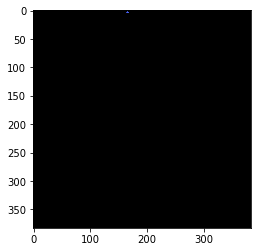

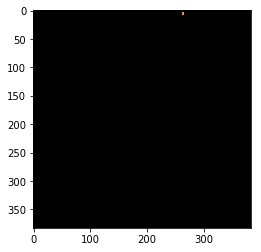

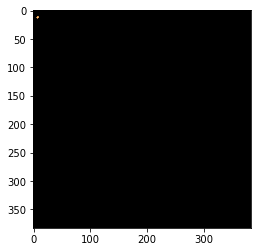

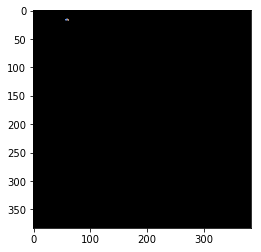

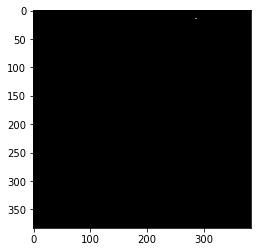

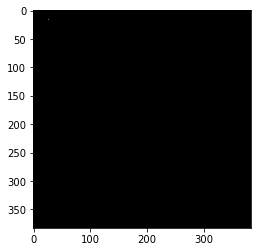

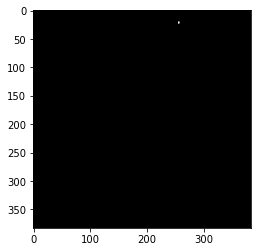

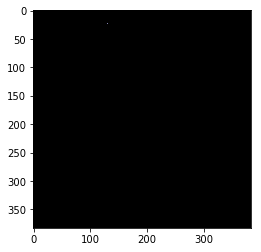

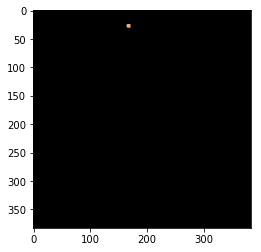

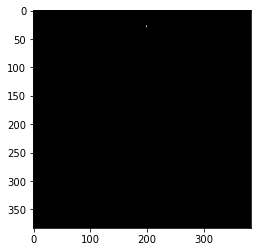

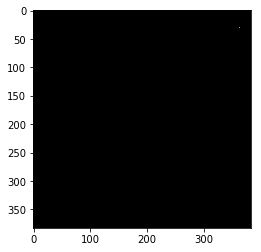

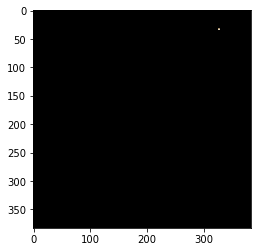

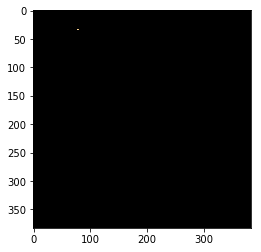

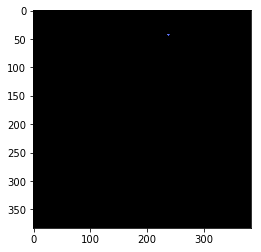

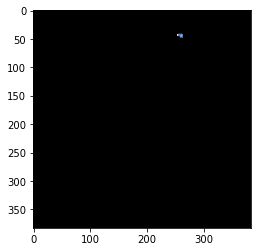

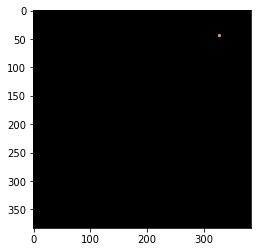

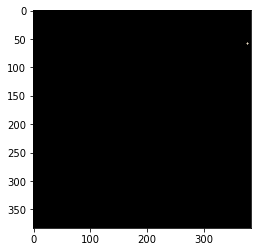

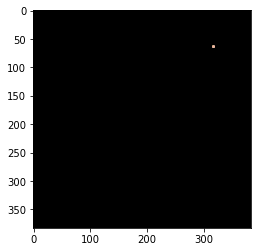

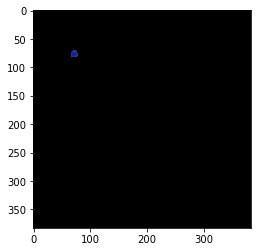

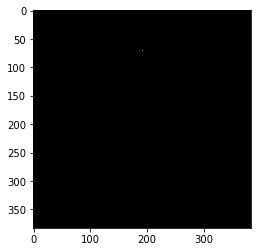

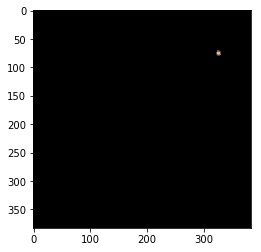

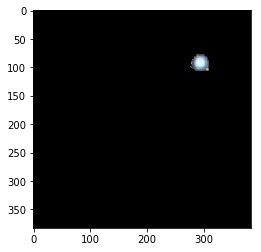

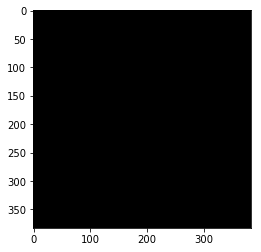

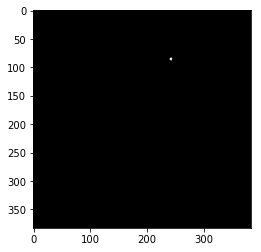

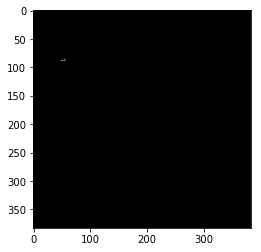

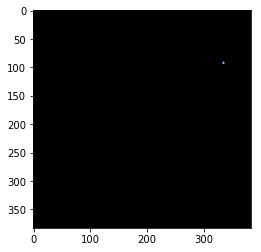

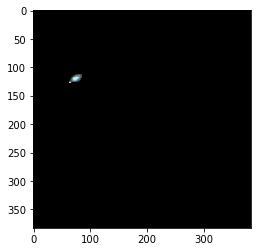

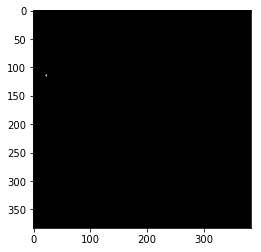

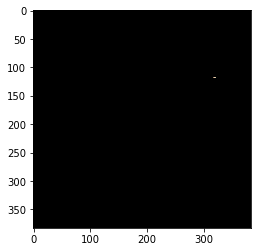

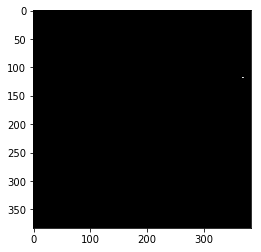

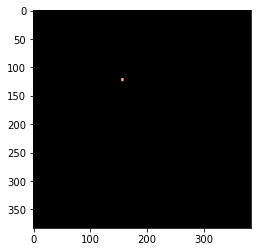

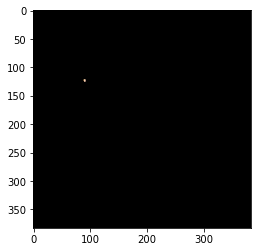

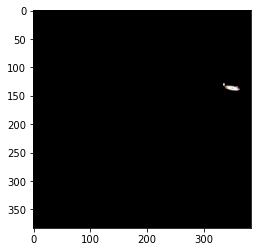

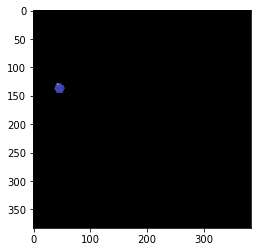

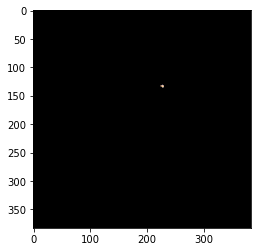

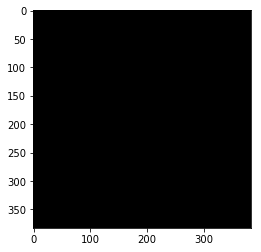

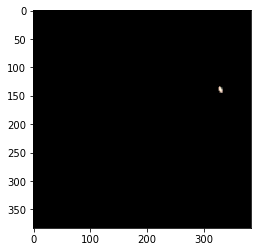

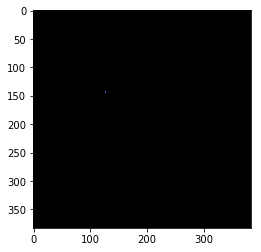

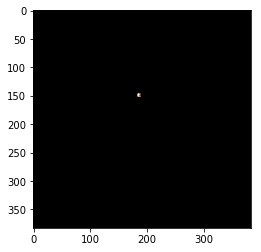

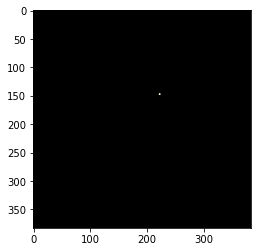

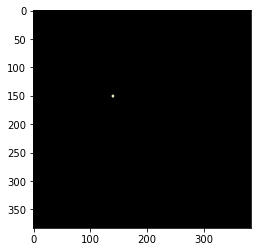

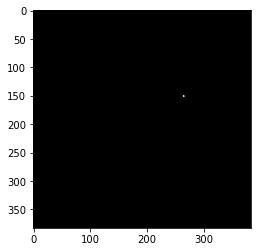

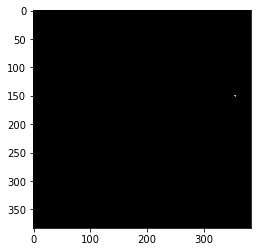

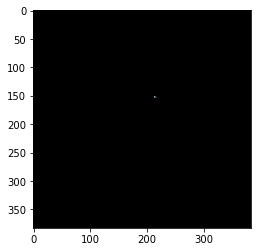

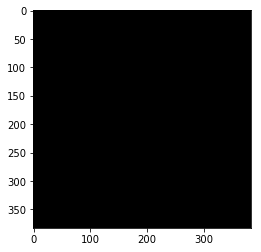

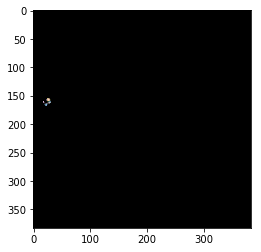

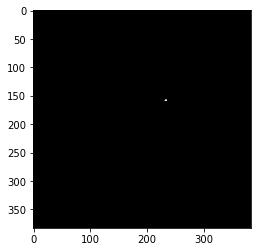

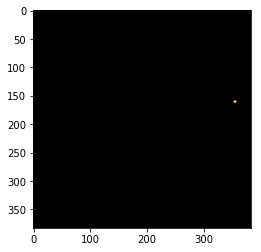

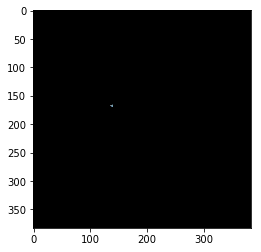

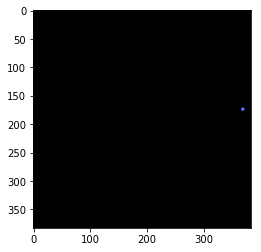

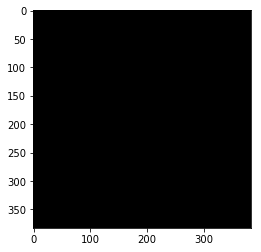

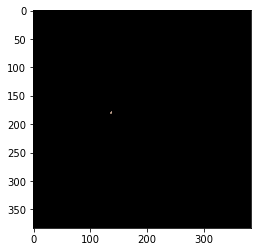

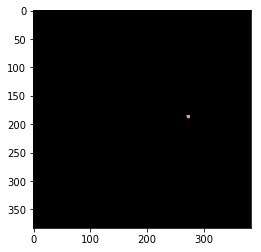

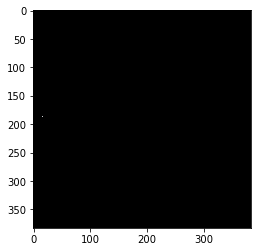

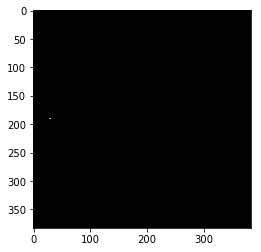

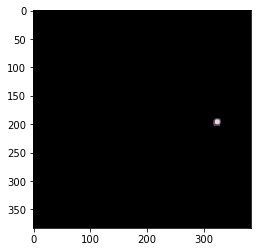

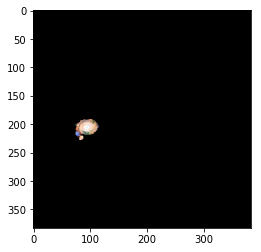

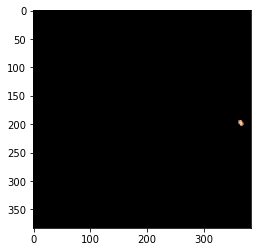

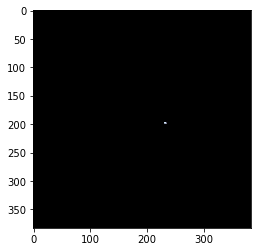

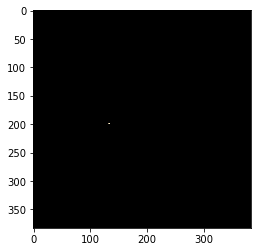

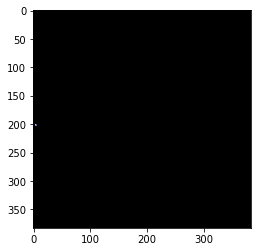

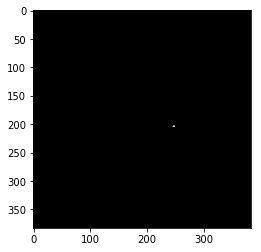

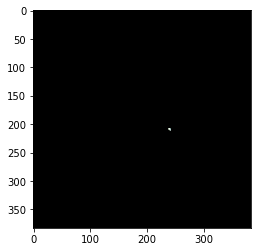

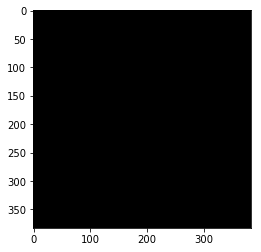

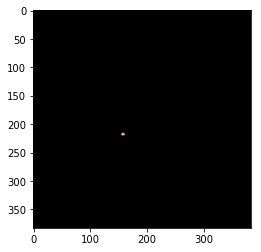

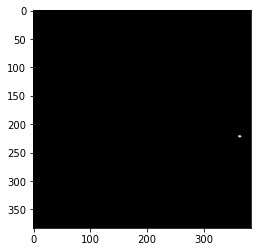

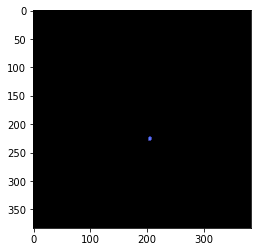

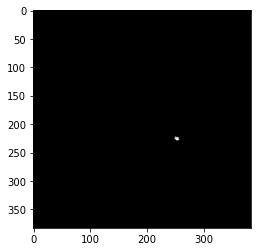

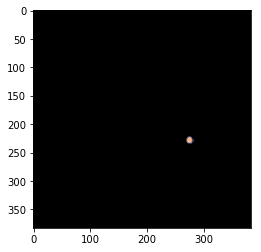

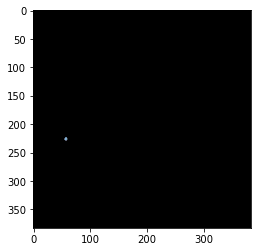

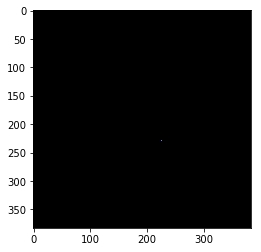

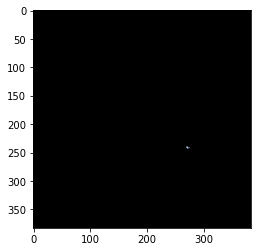

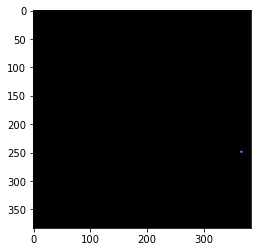

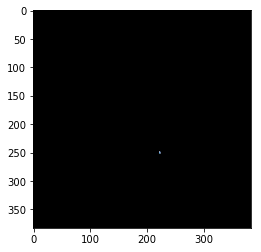

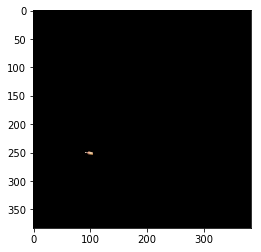

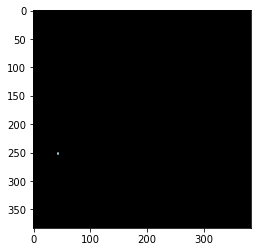

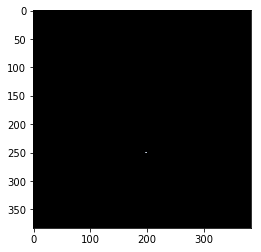

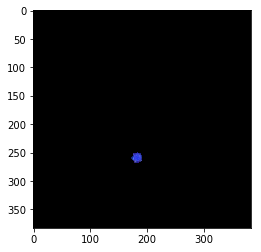

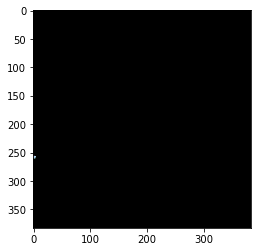

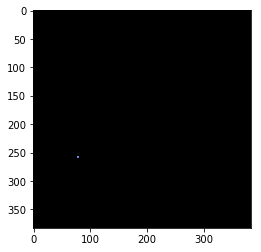

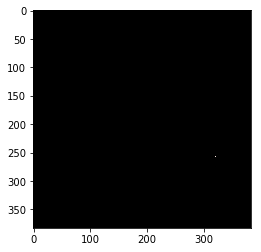

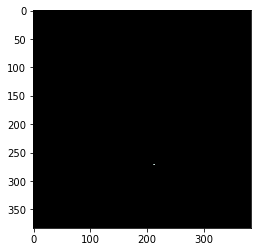

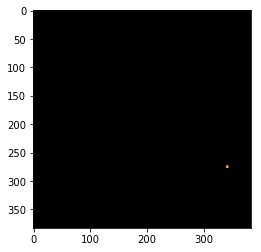

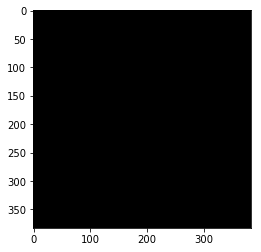

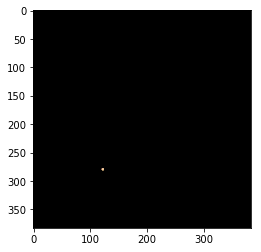

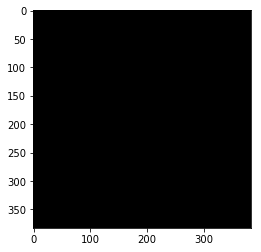

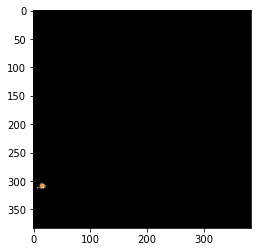

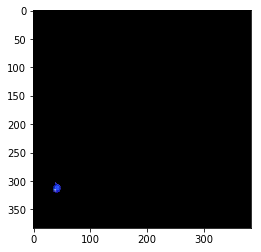

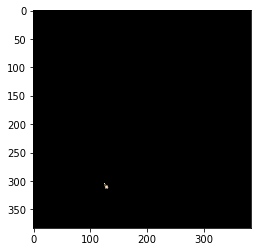

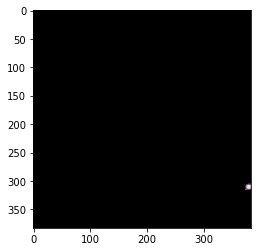

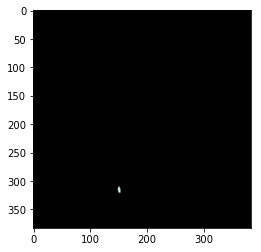

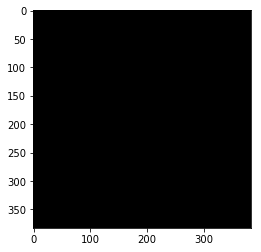

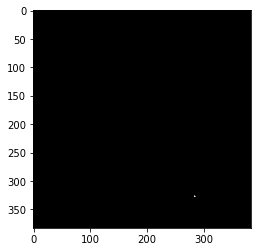

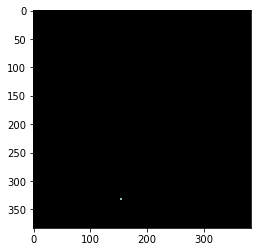

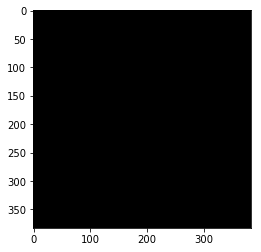

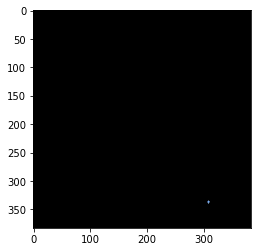

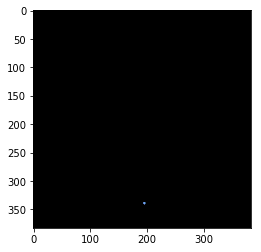

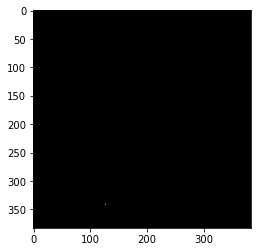

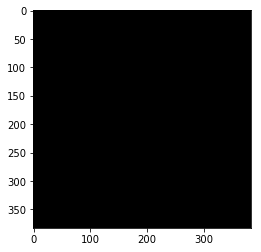

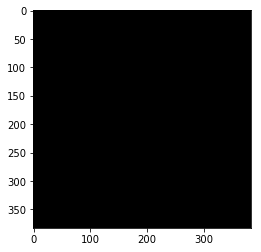

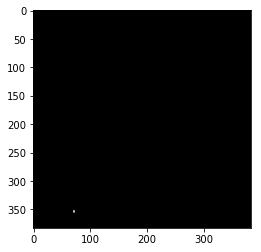

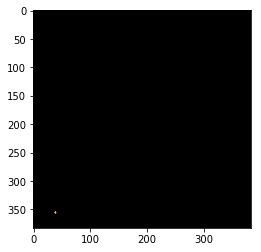

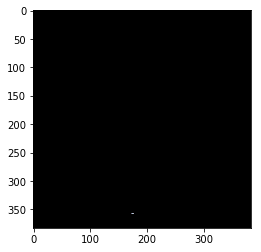

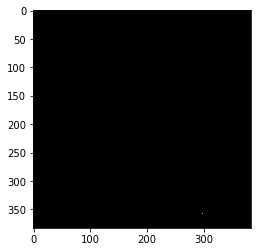

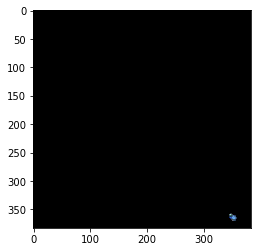

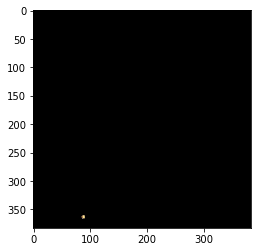

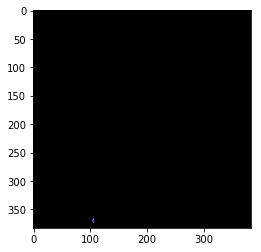

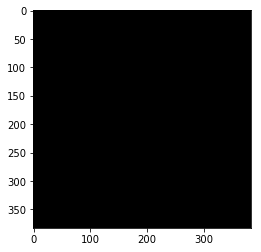

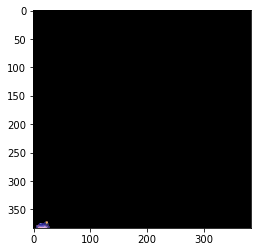

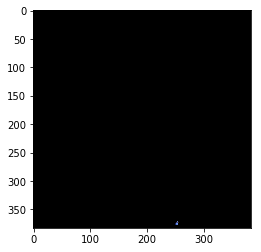

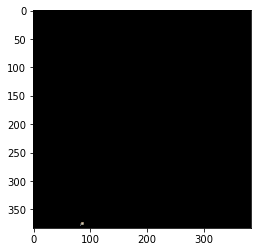

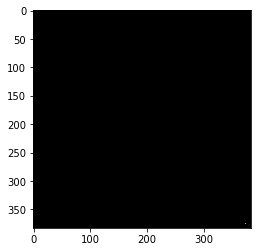

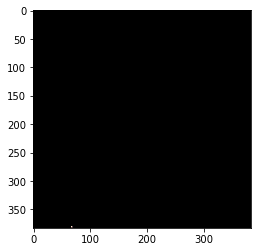

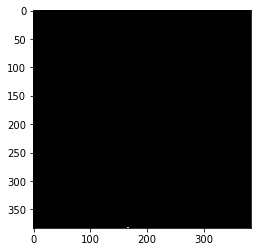

In [21]:
# loop over the unique components
image_identiciation_dataset = [] #array for prediction with a CNN. 
for label in np.unique(labels):  
    image = cv2.imread(imagefile)  #read in the image
    print(label)
# if this is the background label, ignore it
    if label == 0:
        continue
 
    # otherwise, construct the label mask and count the
    # number of pixels 
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255  #immediately make it as large as possible
   # plt.figure()
    for i in range(len(labelMask)):
        for j in range(len(labelMask[i])):  #create a mask on the array, revealing only the important object at that time. 
            if labelMask[i][j] == 0:  
                labelMask[i][j] = False
            else:
                labelMask[i][j] = True
    for color in range(np.shape(image)[2]):
    #print(image[:,:,color]) #this is one particular color 
        image[:,:,color] = np.multiply(labelMask,image[:,:,color])  #apply masking to each RGB filter
    image_identiciation_dataset.append(image)  #append the rgb image to the array
    plt.figure()
    plt.imshow(image)
    plt.savefig('../plots/' +str(label)+'.png')
    #plt.savefig  #plot the new object as proof of concept.
    

In [17]:
plt.figure()
plt.plot(img)
plt.savefig('../plots/' +str(label)+'.png')

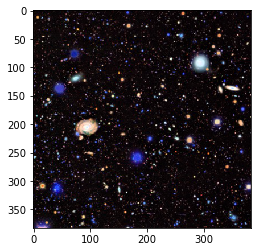

In [96]:
plt.imshow(image[:,:])

In [46]:
#if ==0, make false, if 255 make tru
#Dirty method right here

for i in range(len(labelMask)):
    for j in range(len(labelMask[i])):
        if labelMask[i][j] == 0:
            labelMask[i][j] = False
        else:
            labelMask[i][j] = True

In [47]:
#combine labelmask with original image. .. in greyscale! 

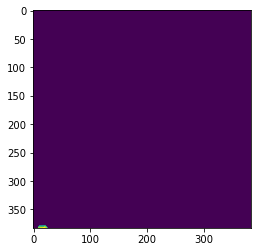

In [48]:
plt.imshow(np.multiply(gray,labelMask))

In [ ]:
# find the contours in the mask, then sort them from left to
# right
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
cnts = contours.sort_contours(cnts)[0]

In [ ]:
# loop over the contours
for (i, c) in enumerate(cnts):
	# draw the bright spot on the image
    (x, y, w, h) = cv2.boundingRect(c)
    ((cX, cY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(image, (int(cX), int(cY)), int(radius),
        (0, 0, 255), 3)
    #cv2.putText(image, "#{}".format(i + 1), (x, y - 15),
    #    cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
 
# show the output image
plt.imshow( image)
cv2.waitKey(0)

In [ ]:
plt.imshow(image)

# Next sort of task: Mask each contour, and use it to create a new image file that contains just one image with each. Then plug it into the CNN. 